<a href="https://colab.research.google.com/github/bchaithanyasai/PredictLateArrivalsPaper/blob/master/Data_Visualization_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [0]:
import pandas as pd

data=pd.read_csv('/content/drive/My Drive/Handled_data.csv')

In [76]:
data

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,TAXI_OUT,WHEELS_OFF,DISTANCE,DIVERTED,AIR_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing
0,0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,205.0,194.0,21.0,15.0,1448,0,169.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
1,1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,280.0,279.0,12.0,14.0,2330,0,263.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
2,2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,286.0,293.0,16.0,34.0,2296,0,266.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
3,3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,285.0,281.0,15.0,30.0,2342,0,258.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
4,4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,235.0,215.0,11.0,35.0,1448,0,199.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,5819074,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,819,753.0,-26.0,320.0,298.0,22.0,17.0,2611,0,272.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
5714004,5819075,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,446,430.0,-16.0,227.0,215.0,17.0,12.0,1617,0,195.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
5714005,5819076,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,440,432.0,-8.0,221.0,222.0,17.0,7.0,1598,0,197.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1
5714006,5819077,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,340,330.0,-10.0,161.0,157.0,10.0,3.0,1189,0,144.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1


In [77]:
airline_counts=dict(data.groupby('AIRLINE').size())
airline_counts

{'AA': 712935,
 'AS': 171439,
 'B6': 262042,
 'DL': 870275,
 'EV': 554752,
 'F9': 90090,
 'HA': 76041,
 'MQ': 278791,
 'NK': 115193,
 'OO': 576814,
 'UA': 507762,
 'US': 194223,
 'VX': 61248,
 'WN': 1242403}

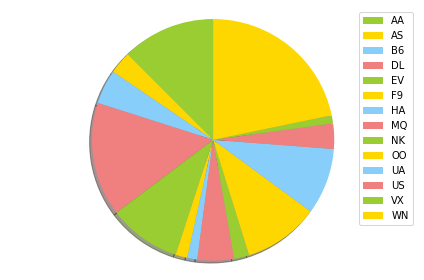

In [78]:
import matplotlib.pyplot as plt

labels = airline_counts.keys()
sizes = airline_counts.values()
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [0]:
import operator
ordered=dict(sorted(airline_counts.items(), key=operator.itemgetter(1),reverse=True))

In [100]:
len(ordered)

14

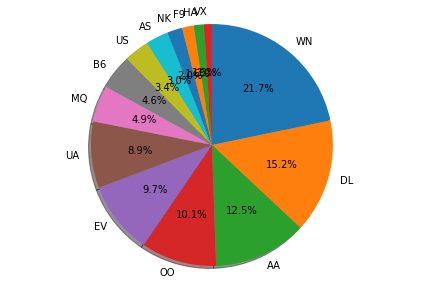

In [81]:
import matplotlib.pyplot as plt

# Data to plot
labels = ordered.keys()
sizes = ordered.values()
# Plot

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90,counterclock=False)

plt.axis('equal')
plt.tight_layout()
plt.show()

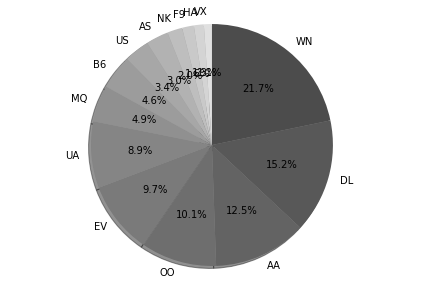

In [82]:
import matplotlib.pyplot as plt
import numpy as np

colors = plt.cm.gray(np.linspace(0.3,0.875,len(ordered)))

# Data to plot
labels = ordered.keys()
sizes = ordered.values()
# Plot

plt.pie(sizes, labels=labels,colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,counterclock=False)

plt.axis('equal')
plt.tight_layout()
plt.show()

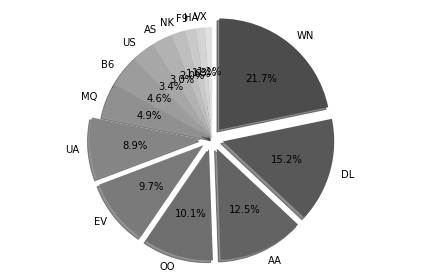

In [83]:
import matplotlib.pyplot as plt
import numpy as np

colors = plt.cm.gray(np.linspace(0.3,0.875,len(ordered)))
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0,0,0,0,0,0,0,0)
# Data to plot
labels = ordered.keys()
sizes = ordered.values()

# Plot

plt.pie(sizes, labels=labels,explode=explode,colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,counterclock=False)

plt.axis('equal')
plt.tight_layout()
plt.show()

In [104]:
import numpy as np
from itertools import islice

def indices_to_merge(dic,cut_off_percent):
  sum=0;cumm_per=0;cummulative_percent=[]
  for key in dic.keys():
    sum=sum+dic[key]
  values=list(dic.values())
  percent_of_outcome=(values/sum)*100
  percent_of_outcome=[round(elem,1) for elem in percent_of_outcome]
  print(percent_of_outcome)
  for percent in percent_of_outcome:
    cumm_per=cumm_per+percent
    cummulative_percent.append(cumm_per)
  print(cummulative_percent)
  return [i for i in range(len(cummulative_percent)) if cummulative_percent[i] > cut_off_percent]

def merge_indices(dic,ind):
  sum=0
  values=list(dic.values())
  print(values)
  sel_values=values[ind[0]:]
  for elem in sel_values:
    sum=sum+elem
  print(sum)
  delete_indices(dic,ind)
  dic['other']=sum
  print(dic)

def delete_indices(dic,indices):
  i = 0
  keys_to_delete = []
  for key in dic.keys():
      if i in indices:
          print(key)
          keys_to_delete.append(key)
      i = i + 1

  for key in keys_to_delete:
      if key in dic:
          del dic[key]

merge_indices(ordered,indices_to_merge(ordered,94))

[21.7, 15.2, 12.5, 10.1, 9.7, 8.9, 4.9, 4.6, 3.4, 3.0, 2.0, 1.6, 1.3, 1.1]
[21.7, 36.9, 49.4, 59.5, 69.2, 78.10000000000001, 83.00000000000001, 87.60000000000001, 91.00000000000001, 94.00000000000001, 96.00000000000001, 97.60000000000001, 98.9, 100.0]
[1242403, 870275, 712935, 576814, 554752, 507762, 278791, 262042, 194223, 171439, 115193, 90090, 76041, 61248]
514011
AS
NK
F9
HA
VX
{'WN': 1242403, 'DL': 870275, 'AA': 712935, 'OO': 576814, 'EV': 554752, 'UA': 507762, 'MQ': 278791, 'B6': 262042, 'US': 194223, 'other': 514011}


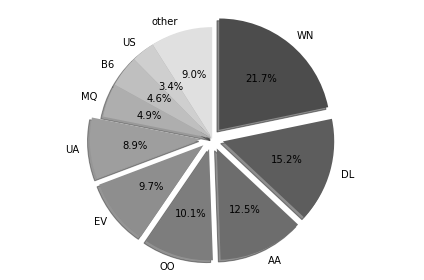

In [102]:
import matplotlib.pyplot as plt
import numpy as np

colors = plt.cm.gray(np.linspace(0.3,0.875,len(ordered)))
explode=(0.1,0.1,0.1,0.1,0.1,0.1,0,0,0,0)
# Data to plot
labels = ordered.keys()
sizes = ordered.values()

# Plot

plt.pie(sizes, labels=labels,explode=explode,colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,counterclock=False)

plt.axis('equal')
plt.tight_layout()
plt.show()

In [24]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : array-like
        The wedge sizes.
    
    explode : array-like, optional, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list,

In [140]:
data=data.assign(dep_del_15=(data.DEPARTURE_DELAY>14).astype(int))
data

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,TAXI_OUT,WHEELS_OFF,DISTANCE,DIVERTED,AIR_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,dep_del_15,outcome
0,0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,205.0,194.0,21.0,15.0,1448,0,169.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
1,1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,280.0,279.0,12.0,14.0,2330,0,263.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
2,2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,286.0,293.0,16.0,34.0,2296,0,266.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
3,3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,285.0,281.0,15.0,30.0,2342,0,258.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
4,4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,235.0,215.0,11.0,35.0,1448,0,199.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,5819074,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,819,753.0,-26.0,320.0,298.0,22.0,17.0,2611,0,272.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
5714004,5819075,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,446,430.0,-16.0,227.0,215.0,17.0,12.0,1617,0,195.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
5714005,5819076,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,440,432.0,-8.0,221.0,222.0,17.0,7.0,1598,0,197.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
5714006,5819077,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,340,330.0,-10.0,161.0,157.0,10.0,3.0,1189,0,144.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0


In [139]:
data=data.assign(outcome=(data.DEPARTURE_DELAY>4).astype(int))
data

,index,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,TAXI_OUT,WHEELS_OFF,DISTANCE,DIVERTED,AIR_TIME,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_SYSTEM_DELAY_is_missing,SECURITY_DELAY_is_missing,AIRLINE_DELAY_is_missing,LATE_AIRCRAFT_DELAY_is_missing,WEATHER_DELAY_is_missing,dep_del_15,outcome
0,0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,205.0,194.0,21.0,15.0,1448,0,169.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
1,1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,280.0,279.0,12.0,14.0,2330,0,263.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
2,2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,286.0,293.0,16.0,34.0,2296,0,266.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
3,3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,285.0,281.0,15.0,30.0,2342,0,258.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
4,4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,235.0,215.0,11.0,35.0,1448,0,199.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714003,5819074,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,819,753.0,-26.0,320.0,298.0,22.0,17.0,2611,0,272.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
5714004,5819075,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,446,430.0,-16.0,227.0,215.0,17.0,12.0,1617,0,195.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
5714005,5819076,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,440,432.0,-8.0,221.0,222.0,17.0,7.0,1598,0,197.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0
5714006,5819077,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,340,330.0,-10.0,161.0,157.0,10.0,3.0,1189,0,144.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,1,0,0


In [144]:
data.dep_del_15.mean()

0.18383278427331567

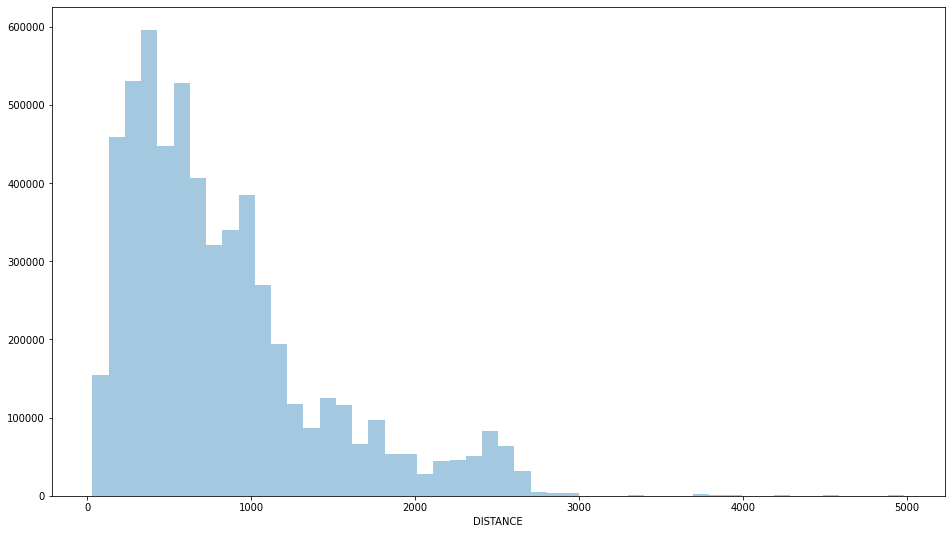

In [153]:
plt.figure(figsize=(16,9))
sns.distplot(data['DISTANCE'],kde=False)

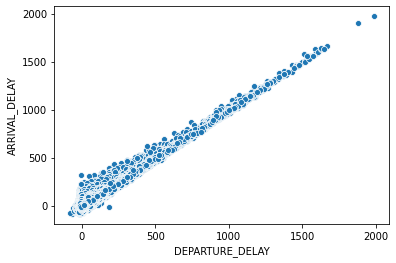

In [157]:
sns.scatterplot(data.DEPARTURE_DELAY,data.ARRIVAL_DELAY)

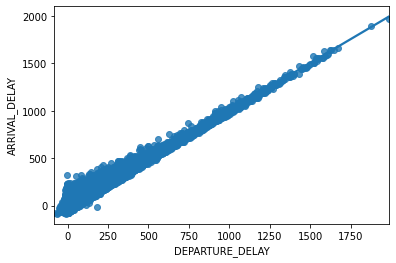

In [158]:
sns.regplot(data.DEPARTURE_DELAY,data.ARRIVAL_DELAY)

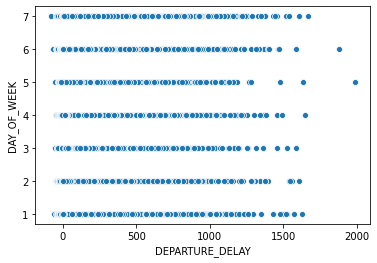

In [159]:
sns.scatterplot(data.DEPARTURE_DELAY,data.DAY_OF_WEEK)

In [206]:
sam=data[['MONTH','AIRLINE','DEPARTURE_DELAY']]
sam

,MONTH,AIRLINE,DEPARTURE_DELAY
0,1,AS,-11.0
1,1,AA,-8.0
2,1,US,-2.0
3,1,AA,-5.0
4,1,AS,-1.0
...,...,...,...
5714003,12,B6,-4.0
5714004,12,B6,-4.0
5714005,12,B6,-9.0
5714006,12,B6,-6.0


In [207]:
df=sam.groupby(['MONTH','AIRLINE']).mean()
df

DEPARTURE_DELAY
MONTH AIRLINE                 
1     AA             10.548335
      AS              3.072086
      B6              9.988331
      DL              5.888215
      EV              9.678895
...                        ...
12    NK             14.311945
      OO             12.699417
      UA             17.745758
      VX             18.382633
      WN             12.855924

[162 rows x 1 columns]

In [208]:
df=df.reset_index()
df

,MONTH,AIRLINE,DEPARTURE_DELAY
0,1,AA,10.548335
1,1,AS,3.072086
2,1,B6,9.988331
3,1,DL,5.888215
4,1,EV,9.678895
...,...,...,...
157,12,NK,14.311945
158,12,OO,12.699417
159,12,UA,17.745758
160,12,VX,18.382633


In [209]:
import pandas as pd

df=df.join(pd.get_dummies(df.AIRLINE))
df.drop('AIRLINE',inplace=True,axis=1)
df

,MONTH,DEPARTURE_DELAY,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,1,10.548335,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,3.072086,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,9.988331,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,5.888215,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,9.678895,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,12,14.311945,0,0,0,0,0,0,0,0,1,0,0,0,0,0
158,12,12.699417,0,0,0,0,0,0,0,0,0,1,0,0,0,0
159,12,17.745758,0,0,0,0,0,0,0,0,0,0,1,0,0,0
160,12,18.382633,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [210]:
cols=(df.columns).drop(['MONTH','DEPARTURE_DELAY'])
for col in cols:
  df[col]=df.DEPARTURE_DELAY*df[col]
df

,MONTH,DEPARTURE_DELAY,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,1,10.548335,10.548335,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,1,3.072086,0.000000,3.072086,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,1,9.988331,0.000000,0.000000,9.988331,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,1,5.888215,0.000000,0.000000,0.000000,5.888215,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,1,9.678895,0.000000,0.000000,0.000000,0.000000,9.678895,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,12,14.311945,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,14.311945,0.000000,0.000000,0.0,0.000000,0.000000
158,12,12.699417,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,12.699417,0.000000,0.0,0.000000,0.000000
159,12,17.745758,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,17.745758,0.0,0.000000,0.000000
160,12,18.382633,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,18.382633,0.000000


In [211]:
df=df.drop('DEPARTURE_DELAY',axis=1)
df=df.groupby('MONTH').sum()
df

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
MONTH,,,,,,,,,,,,,,
1,10.548335,3.072086,9.988331,5.888215,9.678895,17.910765,1.311954,15.995865,13.073100,11.999957,13.885555,5.175011,6.896277,9.453426
2,10.053497,2.613568,19.492738,12.088996,11.137769,25.620629,2.575437,18.307455,16.809932,10.903107,14.834584,9.039882,12.435619,9.814256
3,11.063164,3.007749,15.044718,8.324609,8.817253,19.873837,0.828408,12.117719,12.589259,5.826459,13.793637,5.886201,10.475813,10.073671
4,10.468345,-0.036514,8.213890,6.155252,6.596302,11.562324,-2.216647,8.671830,9.873394,5.280338,12.791827,4.481628,5.622549,8.799611
5,10.985531,-0.247723,7.003266,7.436505,9.963432,11.251146,-1.375662,9.447081,23.524898,5.983105,14.589641,3.985411,10.734360,11.805389
6,14.095703,1.911845,11.319878,10.836347,15.052954,19.023547,-1.217169,12.977325,36.055550,10.104917,24.237770,8.243973,8.705185,15.903023
7,9.688667,2.451084,11.239188,8.229070,9.004684,13.852202,0.684977,8.976380,16.351598,8.801541,19.348397,0.000000,9.727155,15.576901
8,9.301469,3.635269,14.521484,7.717013,7.761056,8.865976,4.830219,8.156082,22.182360,7.671977,14.228945,0.000000,8.888123,11.653772
9,4.940978,0.215922,7.759318,3.491897,3.545922,5.100561,2.062347,4.546901,9.661330,3.823776,7.404981,0.000000,3.292356,5.368931


In [212]:
cols=df.columns
for col in cols:
  print(col,'  ',df[col].mean())

AA    9.31395590328225
AS    1.7141041290678114
B6    11.476809291117439
DL    7.35952959874712
EV    8.58222494514816
F9    13.727211097198923
HA    0.44701559141888825
MQ    9.700594674510693
NK    15.942572832205443
OO    7.788955444606558
UA    14.283571752501102
US    3.067675486779672
VX    8.998892785497505
WN    10.430711875292044


In [162]:
samp=data[['MONTH','AIRLINE','ARRIVAL_DELAY']]
samp

,MONTH,AIRLINE,ARRIVAL_DELAY
0,1,AS,-22.0
1,1,AA,-9.0
2,1,US,5.0
3,1,AA,-9.0
4,1,AS,-21.0
...,...,...,...
5714003,12,B6,-26.0
5714004,12,B6,-16.0
5714005,12,B6,-8.0
5714006,12,B6,-10.0
